In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
# Step 1: Load the dataset
data = pd.read_csv("/content/drive/MyDrive/customer_purchase_data.csv")
data.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
5,66,1,37758.117475,14,4,17.827493,0,2,0
6,39,1,126883.385286,16,3,42.085384,1,4,1
7,64,1,39707.359724,13,2,17.190292,1,0,0
8,43,0,102797.301269,20,1,6.023475,0,3,0
9,20,1,63854.921080,16,0,38.572466,0,5,1


In [3]:
data.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [5]:
data.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [7]:
data.duplicated().sum()
np.int64(0)


0

In [8]:
# Step 2: Create Data Frame
df = pd.DataFrame(data)

In [9]:
# Step 4: Encode categorical variables
label_encoders = {}
categorical_cols = [
    'Age',
    'Gender',
    'AnnualIncome',
    'NumberOfPurchases',
    'ProductCategory',
    'TimeSpentOnWebsite',
    'LoyaltyProgram',
    'DiscountsAvailed',
    'PurchaseStatus',
]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
# Step 5: Define features and target variable
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

In [11]:
# Step 6: Split the dataset into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 7: Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Step 8: Evaluate the model
y_pred = classifier.predict(X_test)

In [14]:
# Step 9: Print evaluation results
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       172
           1       0.92      0.84      0.88       128

    accuracy                           0.90       300
   macro avg       0.90      0.89      0.90       300
weighted avg       0.90      0.90      0.90       300



In [15]:
# Step 10: Create DataFrame for the classification report
report_df = pd.DataFrame(report).transpose()

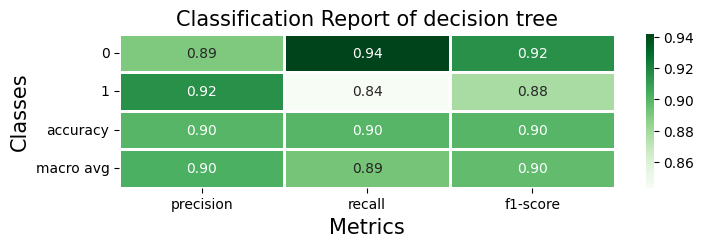

In [19]:
# Step 11: Plotting the heatmap
plt.figure(figsize=(8, 2))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens", cbar=True,
            linewidths=1.0, linecolor='white')


# Adding titles and labels
plt.title('Classification Report of decision tree', fontsize=15)
plt.xlabel('Metrics', fontsize=15)
plt.ylabel('Classes', fontsize=15)

# Step 12: Save the figure
plt.savefig('classification_report_heatmap.png', dpi=200)
plt.show()

# Close the plot
plt.close()
